# Option 1
For DBSCAN it seems like the epsilon matters more than the minPoints because (at least in the provided data sets) there are enough points that any point will have enough points around it. However, a small change in the epsilon can create a whole new cluster or isolate points as noise if there is randomly big enough of a gap.

# Option 3
I tried to implement DBSCAN but there are some random errors that I had no idea how to fix.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [283]:
def dbscan(e, n):
    curClusterNum = 0
    while(len(np.where(data == -1)[0]) > 0):
        index = np.random.choice(np.where(data == -1)[0])
        print(np.where(data == -1)[0], index)
        doFirstPoint(e, n, index, curClusterNum)
        curClusterNum += 1
    
    return data
    
def doOnePoint(e, n, i, cluster):
#     print(c)
    index = i
    startPoint = data[index]
    print(startPoint, 's1')
    closePoints = findClose(e, n, startPoint)
    data[index][2] = cluster
    print(closePoints, 'c')
    print(startPoint, 's')
    for point in closePoints:
        point[2] = cluster
        print(point, 's')
        index = np.where(closePoints == point)
        doOnePoint(e, n, index, cluster)

def doFirstPoint(e, n, i, cluster):
#     print('hi')
    index = i
    startPoint = data[index]
    print(startPoint, 's1')
    closePoints = findClose(e, n, startPoint)
    if(len(closePoints) >= n):
        data[index][2] = cluster
        print(closePoints, 'c')
        print(startPoint, 's')
        for point in closePoints:
            point[2] = cluster
            print(point, 'p')
            index = np.where(closePoints == point)
            print(np.where(closePoints == point))
            doOnePoint(e, n, index, cluster)
    else:
        data[index][2] = -2
        
def findClose(e, n, initPoint):
    closePoints = []
    for point in data:
        if(point[2] == -1 and initPoint[3] != point[3]):
#             print(point)
            dist = np.linalg.norm(initPoint[:2]-point[0:2])
#             print(p[:2], point[0:2], dist)
            if(dist < e):
#                 print(dist)
                closePoints += [point]
#     print([i[3] for i in closePoints])
    return closePoints

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 18
[ 0.4   0.26 -1.   18.  ] s1
[array([ 0.46,  0.12, -1.  ,  2.  ]), array([ 0.34,  0.4 , -1.  , 12.  ]), array([ 0.4 ,  0.33, -1.  , 14.  ]), array([ 0.34,  0.21, -1.  , 16.  ])] c
[ 0.4   0.26  0.   18.  ] s
[0.46 0.12 0.   2.  ] p
(array([0, 0, 0, 0]), array([0, 1, 2, 3]))
[ 0.77  0.65 -1.    0.  ] s1
[] c
[ 0.77  0.65 -1.    0.  ] s
[ 0.34  0.4   0.   12.  ] p
(array([0, 1, 1, 1, 1, 3]), array([2, 0, 1, 2, 3, 0]))
[-1.    0.27  0.93 -1.    1.    0.21] s1
[] c
[-1.    0.27  0.93 -1.    1.    0.21] s
[ 0.4   0.33  0.   14.  ] p
(array([0, 1, 2, 2, 2, 2]), array([2, 2, 0, 1, 2, 3]))
[-1.   -1.    0.46  0.12  0.    2.  ] s1
[] c
[-1.   -1.    0.46  0.12  0.    2.  ] s
[ 0.34  0.21  0.   16.  ] p
(array([0, 1, 1, 2, 3, 3, 3, 3]), array([2, 0, 2, 2, 0, 1, 2, 3]))
[-1.    0.27 -1.    0.    0.21  0.18 -1.    3.  ] s1
[] c
[-1.    0.27 -1.    0.    0.21  0.18 -1.    3.  ] s
[ 0  1  3  4  5  6  7  8  9 10 11 13 15 17 19] 9
[ 0.19

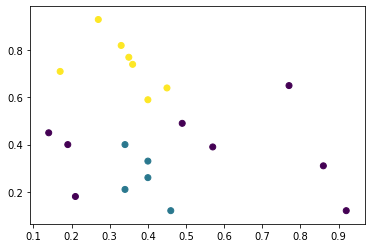

In [284]:
numPoints = 20

xy = np.random.randint(0, 100, (numPoints,2)).astype(float) / 100
preC = np.zeros((numPoints,1))-1
pointNum = np.reshape(np.flip(np.arange(0, numPoints)).astype(float), (numPoints,1))


data = np.rot90(np.reshape(np.append(np.append(xy, preC), pointNum), (4,numPoints)))
dbscan(0.2, 3)

x = [i[0] for i in data]
y = [i[1] for i in data]
c = [i[2] for i in data]

plt.scatter(x,y,c=c)

In [285]:
print(data[data[:,2].argsort()])

[[ 0.77  0.65 -2.    0.  ]
 [ 0.57  0.39 -2.   17.  ]
 [ 0.92  0.12 -2.    8.  ]
 [ 0.86  0.31 -2.    7.  ]
 [ 0.49  0.49 -2.    5.  ]
 [ 0.19  0.4  -2.    9.  ]
 [ 0.21  0.18 -2.    3.  ]
 [ 0.14  0.45 -2.   19.  ]
 [ 0.46  0.12  0.    2.  ]
 [ 0.4   0.26  0.   18.  ]
 [ 0.34  0.4   0.   12.  ]
 [ 0.4   0.33  0.   14.  ]
 [ 0.34  0.21  0.   16.  ]
 [ 0.36  0.74  3.    6.  ]
 [ 0.45  0.64  3.   10.  ]
 [ 0.4   0.59  3.   11.  ]
 [ 0.17  0.71  3.   13.  ]
 [ 0.33  0.82  3.   15.  ]
 [ 0.27  0.93  3.    1.  ]
 [ 0.35  0.77  3.    4.  ]]


In [263]:
a,b = np.array([ 0.52,  0.51, -1.  ,  2.  ]), np.array([ 0.8 ,  0.42, -1.  ,  8.  ])

In [264]:
np.linalg.norm(a[:2]-b[0:2])

0.2941088233970549